In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Etude des brinicles
"""

DataFolder="C:/Users/Julie_000/Desktop/IPT"

# Importation des librairies

In [3]:
import matplotlib
import matplotlib.pyplot as plt # pour tracer les figures
import os # pour modifier le dossier de travail
import numpy as np 
from pathlib import Path # Pour rendre les Path compatibles entre Mac et Windows
from matplotlib import rc #Les trois prochaines lignes pour que Ã§a ressemble Ã  latex
rc('font', size=16)
rc('text', usetex=True)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Vitesse de solidification de la banquise : Théorie
## Fresh water

$z_g(t)=\dfrac{\lambda_g}{h} \left(\sqrt{1+t/\tau}-1\right)$,  with   $\tau=\dfrac{\lambda_g^2}{2\Delta h^2}$ and   $\Delta=-\dfrac{\lambda_g T_2}{\rho_g L}$

### Variables

In [4]:
conduc=2.2
h=100
Temp=-25
rho=917
L=334
delta=-conduc*Temp/rho*L
tau=conduc**2/(2*delta*h**2)
D=-conduc*Temp/(L*rho)

In [5]:
print(D)

0.00017957541841072492


### Fonction

In [6]:
def z_g(t):
    return(conduc/h*((1+t/tau)**(1/2)-1))

Attention : j'ai viré le coeff devant

In [7]:
T=np.linspace(0,119,120)
Z=z_g(T)

### Tracé

In [8]:
def plot (X,Y,title,xlabel,ylabel):
    "Fonctio de tracé simple"
    #plot   
    fig,ax=plt.subplots(num=title, figsize=figsize)
    im=plt.plot(X,Y)
    
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    fig.suptitle(title,fontsize=25)
    fig.tight_layout(pad=1.5)
    plt.show()

<IPython.core.display.Javascript object>


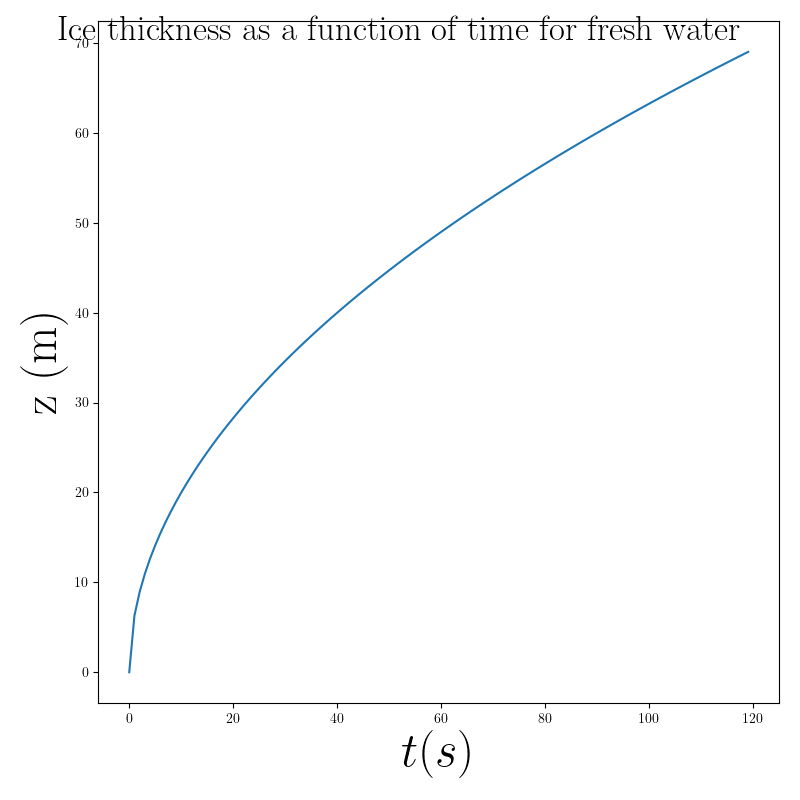

In [9]:
%matplotlib notebook
figsize=(8,8)
fontsize=35
plot(T,Z,'Ice thickness as a function of time for fresh water',r"$t (s)$",r"z (m)")

# Expérience
Expérience de solidification de la banquise (eau salée initialement à 50g/L)
IL VA FALLOIR REFLECHIR AUX INCERTITUDES

## Chargement des données

In [60]:
os.chdir(Path(DataFolder))
donnees0=np.genfromtxt('mesure200928toutcopy.txt',delimiter=',')
print(donnees0)
print(np.shape(donnees0))
donnees=donnees0[5:,:]
donnees[:,0]=donnees0[5:,0]/60

[[  0.   -25.77 -25.2  ... -26.07 -25.73 -26.41]
 [  1.   -25.89 -25.32 ... -26.18 -25.81 -26.48]
 [  2.   -22.69 -21.75 ... -20.74 -18.49 -17.36]
 ...
 [955.   -21.2   -9.97 ...  -5.84  -4.9   -4.33]
 [956.   -20.99  -9.98 ...  -5.86  -4.92  -4.34]
 [957.   -20.96 -10.   ...  -5.89  -4.96  -4.37]]
(958, 9)


## Tracé

In [70]:
def trace_temperatures(donnees,title,xlabel,ylabel):
    fig, ax = plt.subplots(num=title,figsize=figsize)
    #im1=ax.plot(donnees[:,0],donnees[:,1],label=r'$T_1$',linestyle='',marker='.')
    im2=ax.plot(donnees[:,0],donnees[:,2],label=r'$T_2$',linestyle='',marker='.')
    im3=ax.plot(donnees[:,0],donnees[:,3],label=r'$T_3$',linestyle='',marker='.')
    im4=ax.plot(donnees[:,0],donnees[:,4],label=r'$T_4$',linestyle='',marker='.')
    im5=ax.plot(donnees[:,0],donnees[:,5],label=r'$T_5$',linestyle='',marker='.')
    im6=ax.plot(donnees[:,0],donnees[:,6],label=r'$T_6$',linestyle='',marker='.')
    im7=ax.plot(donnees[:,0],donnees[:,7],label=r'$T_7$',linestyle='',marker='.')
    im8=ax.plot(donnees[:,0],donnees[:,8],label=r'$T_8$',linestyle='',marker='.')
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.legend(fontsize=25)
    fig.suptitle(title,fontsize=25)
    fig.tight_layout(pad=3)
    plt.show()

<IPython.core.display.Javascript object>


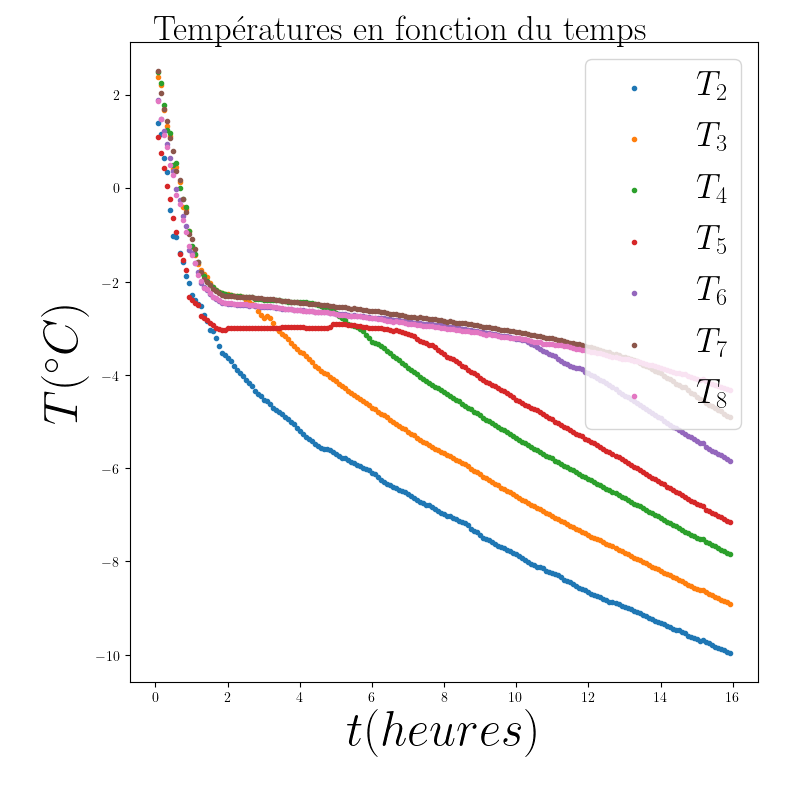

In [71]:
p=5
trace_temperatures(donnees[::p,:],'Températures en fonction du temps',r"$t (heures)$",r"$T (^\circ C)$")

# Croissance horizontale des parois

$t=\dfrac{r_1^2}{2D}\left(\ln(\dfrac{r_0}{r_1})+\dfrac{\lambda_g}{hr_0}+\dfrac{1}{2}\right)-\dfrac{r_0^2}{2}\left(\dfrac{\lambda_g}{hr_0}+\dfrac{1}{2}\right)$  

avec $D=-\dfrac{\lambda T_s}{L\rho_g}$

$\dfrac{L\rho_g}{2\lambda_g r_0}\dfrac{\partial}{\partial t}\left(r_1^2-r_0^2\right)=\dfrac{\partial T}{\partial r}(r_0)$

## Données

In [13]:
T_s=-15
rho_g=917
D=-T_s*conduc/(L*rho_g)
r0=1e-3

## Fonction

In [14]:
def t(r):
    return(r**2/(2*D)*(np.log(r0/r)+conduc/(h*r0)+0.5)-r0**2/2*(conduc/(h*r0)+0.5))

In [15]:
R=np.linspace(r0,10*r0,200)
T2=t(R)

## Tracé

<IPython.core.display.Javascript object>


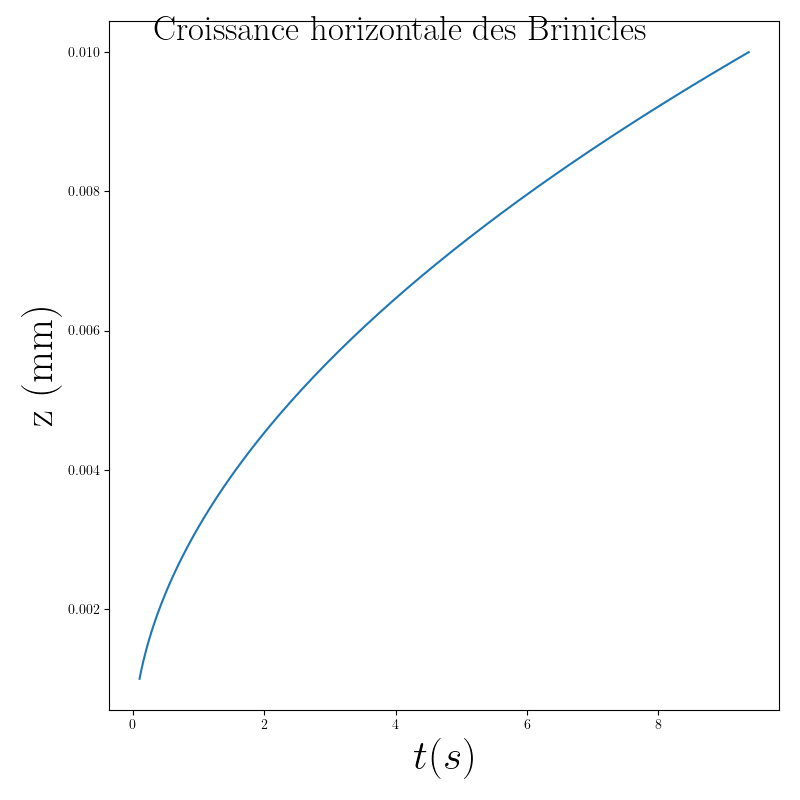

In [16]:
%matplotlib notebook
figsize=(8,8)
fontsize=30
plot(T2,R,'Croissance horizontale des Brinicles',r"$t (s)$",r"z (mm)")